### Car condition evaluation Using K-nearest neighbour classifier algorithm

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [7]:
df = pd.read_csv('car.data')

In [42]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [14]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [15]:
le = preprocessing.LabelEncoder()

In [21]:
buying = le.fit_transform(list(df['buying']))
maint = le.fit_transform(list(df['maint']))
doors = le.fit_transform(list(df['doors']))
persons = le.fit_transform(list(df['persons']))
lug_boot = le.fit_transform(list(df['lug_boot']))
safety = le.fit_transform(list(df['safety']))
cls = le.fit_transform(list(df['class']))

In [24]:
X = list(zip(buying, maint, doors, persons, lug_boot, safety))
y = list(cls)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [31]:
model = KNeighborsClassifier(n_neighbors = 9)

In [32]:
model

KNeighborsClassifier(n_neighbors=9)

In [33]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [34]:
accuracy = model.score(X_test, y_test)

In [35]:
print(accuracy)

0.9248554913294798


In [36]:
predicted = model.predict(X_test)

In [39]:
names = ["unacc", "acc", "good", "vgood"]

In [41]:
for x in range(len(predicted)):
    print("Predicted:",names[predicted[x]], "Data: ",X_test[x], "Actual : ", names[y_test[x]])

Predicted: good Data:  (1, 1, 1, 0, 1, 0) Actual :  good
Predicted: good Data:  (2, 1, 3, 2, 2, 1) Actual :  good
Predicted: good Data:  (0, 0, 1, 2, 2, 1) Actual :  good
Predicted: good Data:  (2, 2, 0, 0, 0, 1) Actual :  good
Predicted: good Data:  (0, 3, 1, 1, 2, 0) Actual :  good
Predicted: unacc Data:  (2, 2, 0, 1, 2, 0) Actual :  unacc
Predicted: good Data:  (0, 3, 0, 1, 1, 1) Actual :  good
Predicted: good Data:  (0, 3, 0, 2, 2, 0) Actual :  good
Predicted: good Data:  (3, 0, 2, 0, 2, 2) Actual :  good
Predicted: good Data:  (0, 2, 0, 0, 0, 2) Actual :  good
Predicted: good Data:  (0, 1, 3, 0, 1, 1) Actual :  good
Predicted: good Data:  (2, 2, 1, 0, 1, 2) Actual :  good
Predicted: good Data:  (1, 1, 3, 2, 2, 1) Actual :  good
Predicted: good Data:  (0, 3, 0, 2, 2, 2) Actual :  good
Predicted: good Data:  (0, 0, 1, 2, 1, 2) Actual :  unacc
Predicted: unacc Data:  (3, 0, 3, 2, 0, 2) Actual :  good
Predicted: good Data:  (1, 3, 1, 0, 0, 0) Actual :  good
Predicted: good Data:  (0, 

### Plot the car condition chart 

In [47]:
class_counts = df['class'].value_counts()

In [45]:
class_counts

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

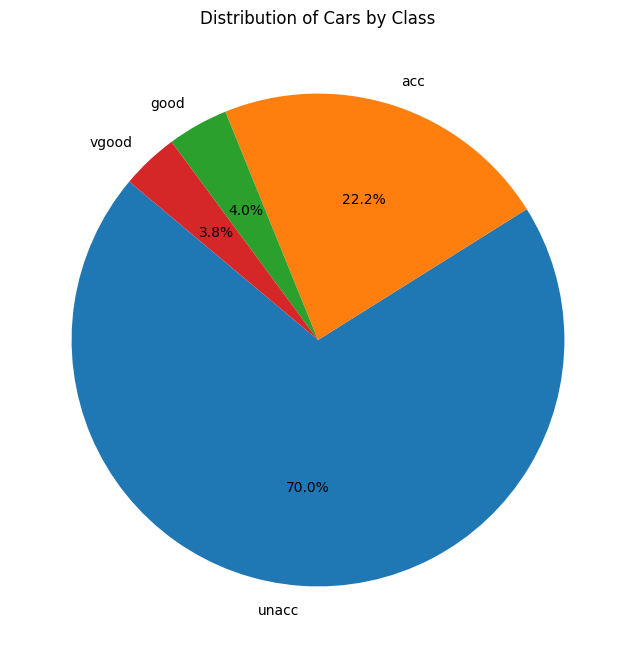

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Cars by Class')
plt.show()
